<a href="https://colab.research.google.com/github/brodyandre/fazendo_etl_em_dados_de_vendas/blob/main/etl_em_dados_de_vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Limpeza e Transformação de Dados de Vendas

##🔍 Objetivo:
Este notebook tem como objetivo realizar a limpeza, transformação e agregação de dados de vendas extraídos de um arquivo JSON.

##📌 Instalação de Dependências:
Para garantir que o ambiente de execução possua as bibliotecas necessárias, execute o comando abaixo:

In [5]:
!pip install pandas

##📌 Importação de Bibliotecas:
As bibliotecas essenciais para a manipulação e análise dos dados são importadas:

In [6]:
import numpy
import json
import pandas as pd

## 📌 Leitura dos Dados:
Os dados de vendas dos clientes estão armazenados em um arquivo JSON chamado dados_vendas_clientes.json. A leitura é feita utilizando a função json.load().

In [7]:
with open('/content/dados_vendas_clientes.json', 'r') as file:
    dados = json.load(file)


## 📌 Transformação para DataFrame:
Para facilitar a manipulação, os dados são convertidos para um DataFrame do Pandas, e, em seguida, normalizados para expandir a estrutura JSON interna:

In [8]:
dados = pd.DataFrame(dados)
dados = pd.json_normalize(dados['dados_vendas'])
dados

,Data de venda,Cliente,Valor da compra
0,06/06/2022,"[@ANA _LUCIA 321, DieGO ARMANDIU 210, DieGO AR...","[R$ 836,5, R$ 573,33, R$ 392,8, R$ 512,34]"
1,07/06/2022,"[Isabely JOanes 738, Isabely JOanes 738, Isabe...","[R$ 825,31, R$ 168,07, R$ 339,18, R$ 314,69]"
2,08/06/2022,"[Isabely JOanes 738, JOãO Gabriel 671, Julya m...","[R$ 682,05, R$ 386,34, R$ 622,65, R$ 630,79]"
3,09/06/2022,"[Julya meireles 914, MaRIA Julia 444, MaRIA Ju...","[R$ 390,3, R$ 759,16, R$ 334,47, R$ 678,78]"
4,10/06/2022,"[MaRIA Julia 444, PEDRO PASCO 812, Paulo castr...","[R$ 314,24, R$ 311,15, R$ 899,16, R$ 885,24]"


##📌 Renomeando as Colunas:
Para melhor entendimento e padronização, as colunas são renomeadas:

data_da_venda → Representa a data em que a venda foi realizada.

cliente → Nome do cliente que efetuou a compra.

valor_da_compra → Valor da compra realizada.

In [9]:
colunas = list(dados.columns)
dados = dados.rename(columns={colunas[0]: 'data_da_venda',
                              colunas[1]: 'cliente',
                              colunas[2]: 'valor_da_compra'})
dados

,data_da_venda,cliente,valor_da_compra
0,06/06/2022,"[@ANA _LUCIA 321, DieGO ARMANDIU 210, DieGO AR...","[R$ 836,5, R$ 573,33, R$ 392,8, R$ 512,34]"
1,07/06/2022,"[Isabely JOanes 738, Isabely JOanes 738, Isabe...","[R$ 825,31, R$ 168,07, R$ 339,18, R$ 314,69]"
2,08/06/2022,"[Isabely JOanes 738, JOãO Gabriel 671, Julya m...","[R$ 682,05, R$ 386,34, R$ 622,65, R$ 630,79]"
3,09/06/2022,"[Julya meireles 914, MaRIA Julia 444, MaRIA Ju...","[R$ 390,3, R$ 759,16, R$ 334,47, R$ 678,78]"
4,10/06/2022,"[MaRIA Julia 444, PEDRO PASCO 812, Paulo castr...","[R$ 314,24, R$ 311,15, R$ 899,16, R$ 885,24]"


##📌 Explosão de Dados e Reset do Índice:
As colunas são explodidas para garantir que dados aninhados sejam distribuídos corretamente, e o índice é redefinido:

In [10]:
colunas = list(dados.columns)
dados = dados.explode(colunas[1:])
dados.reset_index(drop=True, inplace=True)
dados

,data_da_venda,cliente,valor_da_compra
0,06/06/2022,@ANA _LUCIA 321,"R$ 836,5"
1,06/06/2022,DieGO ARMANDIU 210,"R$ 573,33"
2,06/06/2022,DieGO ARMANDIU 210,"R$ 392,8"
3,06/06/2022,DieGO ARMANDIU 210,"R$ 512,34"
4,07/06/2022,Isabely JOanes 738,"R$ 825,31"
5,07/06/2022,Isabely JOanes 738,"R$ 168,07"
6,07/06/2022,Isabely JOanes 738,"R$ 339,18"
7,07/06/2022,Isabely JOanes 738,"R$ 314,69"
8,08/06/2022,Isabely JOanes 738,"R$ 682,05"
9,08/06/2022,JOãO Gabriel 671,"R$ 386,34"


##📌 Limpeza da Coluna de Clientes:
Alguns nomes de clientes estavam com formatação inadequada. Um processo de limpeza foi realizado para padronizar os nomes:

In [11]:
dados['cliente'] = dados['cliente'].replace('@ANA _LUCIA 321', 'Ana Lucia')
dados['cliente'] = dados['cliente'].str.replace('DieGO ARMANDIU 210', 'Diego Armandiu')
dados['cliente'] = dados['cliente'].str.replace('Isabely JOanes 738', 'Isabely Joanes')
dados['cliente'] = dados['cliente'].str.replace('JOãO Gabriel 671', 'João Gabriel')
dados['cliente'] = dados['cliente'].str.replace('Julya meireles 914', 'Julya Meireles')
dados['cliente'] = dados['cliente'].str.replace('MaRIA Julia 444', 'Maria Julia')
dados['cliente'] = dados['cliente'].str.replace('PEDRO PASCO 812', 'Pedro Pasco')
dados['cliente'] = dados['cliente'].str.replace('Paulo castro 481', 'Paulo Castro')
dados['cliente'] = dados['cliente'].str.replace('Thiago fritzz 883', 'Thiago Fritzz')
dados

,data_da_venda,cliente,valor_da_compra
0,06/06/2022,Ana Lucia,"R$ 836,5"
1,06/06/2022,Diego Armandiu,"R$ 573,33"
2,06/06/2022,Diego Armandiu,"R$ 392,8"
3,06/06/2022,Diego Armandiu,"R$ 512,34"
4,07/06/2022,Isabely Joanes,"R$ 825,31"
5,07/06/2022,Isabely Joanes,"R$ 168,07"
6,07/06/2022,Isabely Joanes,"R$ 339,18"
7,07/06/2022,Isabely Joanes,"R$ 314,69"
8,08/06/2022,Isabely Joanes,"R$ 682,05"
9,08/06/2022,João Gabriel,"R$ 386,34"


##📌 Conversão da Data para Formato DateTime:
Para facilitar operações futuras, a coluna de data é convertida para o tipo datetime:

In [12]:
dados['data_da_venda'] = pd.to_datetime(dados['data_da_venda'], format='%d/%m/%Y')
dados

,data_da_venda,cliente,valor_da_compra
0,2022-06-06,Ana Lucia,"R$ 836,5"
1,2022-06-06,Diego Armandiu,"R$ 573,33"
2,2022-06-06,Diego Armandiu,"R$ 392,8"
3,2022-06-06,Diego Armandiu,"R$ 512,34"
4,2022-06-07,Isabely Joanes,"R$ 825,31"
5,2022-06-07,Isabely Joanes,"R$ 168,07"
6,2022-06-07,Isabely Joanes,"R$ 339,18"
7,2022-06-07,Isabely Joanes,"R$ 314,69"
8,2022-06-08,Isabely Joanes,"R$ 682,05"
9,2022-06-08,João Gabriel,"R$ 386,34"


##📌 Limpeza e Conversão dos Valores Monetários:
Os valores monetários estavam no formato brasileiro (com vírgula e "R$"). Foi realizada a remoção de símbolos e conversão para float:

In [13]:
# Removendo o símbolo 'R$' e formatando os valores
dados['valor_da_compra'] = dados['valor_da_compra'].str.replace('R\$', '', regex=True)
dados['valor_da_compra'] = dados['valor_da_compra'].str.replace('.', '', regex=False)
dados['valor_da_compra'] = dados['valor_da_compra'].str.replace(',', '.', regex=False)

# Convertendo para float64
dados['valor_da_compra'] = dados['valor_da_compra'].astype('float64')



##📌 Formatação da Data (opcional):
Caso seja necessário formatar a data para uma visualização específica:

In [14]:
# Formatação da Data:
dados['data_da_venda'] = dados['data_da_venda'].dt.strftime('%d/%m/%Y')
dados

,data_da_venda,cliente,valor_da_compra
0,06/06/2022,Ana Lucia,836.50
1,06/06/2022,Diego Armandiu,573.33
2,06/06/2022,Diego Armandiu,392.80
3,06/06/2022,Diego Armandiu,512.34
4,07/06/2022,Isabely Joanes,825.31
5,07/06/2022,Isabely Joanes,168.07
6,07/06/2022,Isabely Joanes,339.18
7,07/06/2022,Isabely Joanes,314.69
8,08/06/2022,Isabely Joanes,682.05
9,08/06/2022,João Gabriel,386.34


##📌 Agregação dos Dados:
Os dados são agregados para mostrar o total de compras por cliente em cada data específica:

In [15]:
# Agregação dos Dados:
# Os dados são agregados para mostrar o total de compras por cliente em cada data específica:
total_compras_por_cliente = dados.groupby(['data_da_venda', 'cliente'])['valor_da_compra'].sum().reset_index()
total_compras_por_cliente = total_compras_por_cliente.rename(columns={'valor_da_compra': 'total_gasto'})
total_compras_por_cliente


,data_da_venda,cliente,total_gasto
0,06/06/2022,Ana Lucia,836.50
1,06/06/2022,Diego Armandiu,1478.47
2,07/06/2022,Isabely Joanes,1647.25
3,08/06/2022,Isabely Joanes,682.05
4,08/06/2022,João Gabriel,386.34
5,08/06/2022,Julya Meireles,1253.44
6,09/06/2022,Julya Meireles,390.30
7,09/06/2022,Maria Julia,1772.41
8,10/06/2022,Maria Julia,314.24
9,10/06/2022,Paulo Castro,899.16


##📌 Visualização Final dos Dados:
Para visualizar o DataFrame resultante, basta executar:

In [18]:
total_compras_por_cliente.head()

,data_da_venda,cliente,total_gasto
0,06/06/2022,Ana Lucia,836.50
1,06/06/2022,Diego Armandiu,1478.47
2,07/06/2022,Isabely Joanes,1647.25
3,08/06/2022,Isabely Joanes,682.05
4,08/06/2022,João Gabriel,386.34


##📌 Grafico de Despesas por Cliente:
Visualização dos dados em forma de gráfico (bar).

**negrito**

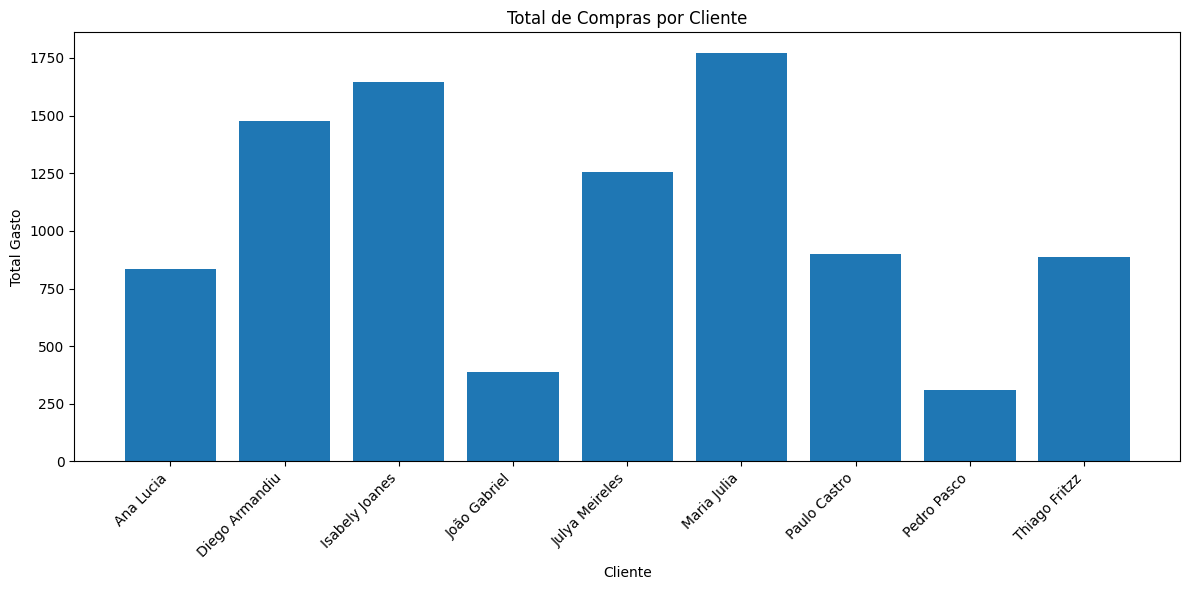

In [19]:
import matplotlib.pyplot as plt

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))  # Ajustar o tamanho da figura
plt.bar(total_compras_por_cliente['cliente'], total_compras_por_cliente['total_gasto'])
plt.xlabel('Cliente')
plt.ylabel('Total Gasto')
plt.title('Total de Compras por Cliente')
plt.xticks(rotation=45, ha='right')  # Rotacionar os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajustar o layout para evitar sobreposição de elementos
plt.show()


##📌 Conclusões:

1. Removemos os dados em lista dentro do DataFrame
2. Verificamos os tipos de dados
3. Identificamos as colunas numéricas
4. Transformamos as colunas numéricas para o tipo númerico
5. Realizamos uma limpeza nos nomes dos clientes
6. Fizemos um ajuste no formato das datas
7. Agregamos as compras por cliente e data somando o total de valores
8. Plotamos um gráfico
